In [1]:
%matplotlib inline

In [2]:
## Required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation, rc
from IPython.display import HTML

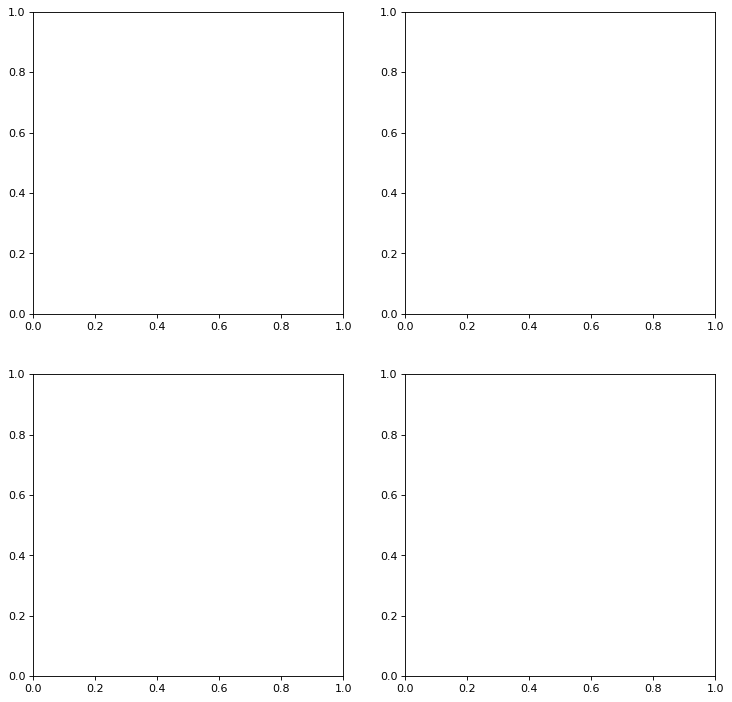

In [3]:
## change the values 2, 2 as desired, it represents the number of rows and columns
fig, ax = plt.subplots(2, 2, figsize=(11, 11))
## cange dpi value to inc/dec the quality of the video
fig.dpi = 80

In [4]:
df = pd.read_csv("Data/data.csv")

## The plot on the top left has the index [0,0], the index then follows that of a common matrix
line1, = ax[0,0].plot([], [], color="red")
line2, = ax[0,1].plot([], [], color="green")
line3, = ax[1,0].plot([], [], color="orange")
line4, = ax[1,1].plot([], [], color="blue")

line = [line1, line2, line3, line4]

In [5]:
# initialization function: plot the background of each frame
def init():
    for l in line:
        l.set_data([], [])
    return line

In [6]:
# animation function. This is called sequentially
def animate(i):
    interval = 100
    i *=interval
    for j in range(1,5):
        x = df.iloc[i:(i+interval),0].values
        y = df.iloc[i:(i+interval),j].values
        idx = 1
        if j <= 2:
            idx = 0
        ax[idx,(j+1)%2].set_xlim(i,i+interval)
        ax[idx,(j+1)%2].set_ylim((df.iloc[:,j].min(), df.iloc[:,j].max()))
        line[j-1].set_data(x,y)
    return line

In [7]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=426, interval=1000, blit=True)

In [8]:
HTML(anim.to_html5_video())